### Properly extend PATH to make imports work correctly.

In [2]:
import os
ROOT_PROJECT_DIR = os.path.join(*os.getcwd().split(os.sep)[:-1])
os.chdir("..")
ROOT_PROJECT_DIR

'home/said/Inno/PMLDL/assignment2/pmldl-rec-sys'

In [3]:
import sys
if ROOT_PROJECT_DIR not in sys.path:
    sys.path.append(ROOT_PROJECT_DIR)

### Imports

In [4]:
import pandas as pd
import seaborn as sns

In [5]:
from utils.prepare_data import get_movie_table, get_users_table

## Read and preprocess data

In [6]:
"""General information about dataset"""

general_info = pd.read_csv("data/raw/u.info", sep=" ", header=None)
general_info.columns = ["counts", "instance_type"]
general_info

,counts,instance_type
0,943,users
1,1682,items
2,100000,ratings


In [7]:
"""List geners"""

geners = pd.read_csv("data/raw/u.genre", sep="|", header=None)
geners.columns = ["name", "id"]
geners

,name,id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4
5,Comedy,5
6,Crime,6
7,Documentary,7
8,Drama,8
9,Fantasy,9


In [25]:
list(geners["name"])

['unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [8]:
"""List occupations"""

occupations = pd.read_csv("data/raw/u.occupation", header=None)
occupations.columns = ["name"]
occupations

,name
0,administrator
1,artist
2,doctor
3,educator
4,engineer
5,entertainment
6,executive
7,healthcare
8,homemaker
9,lawyer


**Get data about movies**

In [9]:
movies = pd.read_csv("data/raw/u.item", sep="|", encoding="latin-1", header=None)
movies.columns = ["movie_id", "title", "release_date", "video_release_date", "url"] + list(
    geners["name"]
)
movies.head(5)

,movie_id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [10]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            1682 non-null   int64  
 1   title               1682 non-null   object 
 2   release_date        1681 non-null   object 
 3   video_release_date  0 non-null      float64
 4   url                 1679 non-null   object 
 5   unknown             1682 non-null   int64  
 6   Action              1682 non-null   int64  
 7   Adventure           1682 non-null   int64  
 8   Animation           1682 non-null   int64  
 9   Children's          1682 non-null   int64  
 10  Comedy              1682 non-null   int64  
 11  Crime               1682 non-null   int64  
 12  Documentary         1682 non-null   int64  
 13  Drama               1682 non-null   int64  
 14  Fantasy             1682 non-null   int64  
 15  Film-Noir           1682 non-null   int64  
 16  Horror

One can see that the column 'video_release_date' contains NaN only, so we can remove it.
Also, column 'url' seems to be useless to, so we can drop it.

Moreover, it seems to be a good idea to clean the titles of movies, for example convert them to lowercase and remove special symbols and digits.
Another good idea may be to take only the year from release date. 

In [11]:
movies_preprocessed = get_movie_table(movies)
movies_preprocessed.head(5)

,movie_id,title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,toy story,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,goldeneye,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
2,3,four rooms,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995
3,4,get shorty,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,5,copycat,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1995


In [12]:
print(movies_preprocessed.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1681 entries, 0 to 1681
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   movie_id     1681 non-null   int64 
 1   title        1681 non-null   object
 2   unknown      1681 non-null   int64 
 3   Action       1681 non-null   int64 
 4   Adventure    1681 non-null   int64 
 5   Animation    1681 non-null   int64 
 6   Children's   1681 non-null   int64 
 7   Comedy       1681 non-null   int64 
 8   Crime        1681 non-null   int64 
 9   Documentary  1681 non-null   int64 
 10  Drama        1681 non-null   int64 
 11  Fantasy      1681 non-null   int64 
 12  Film-Noir    1681 non-null   int64 
 13  Horror       1681 non-null   int64 
 14  Musical      1681 non-null   int64 
 15  Mystery      1681 non-null   int64 
 16  Romance      1681 non-null   int64 
 17  Sci-Fi       1681 non-null   int64 
 18  Thriller     1681 non-null   int64 
 19  War          1681 non-null   int

**Get users data**

In [13]:
users = pd.read_csv("data/raw/u.user", sep="|", encoding="latin-1", header=None)
users.columns = ["user_id", "age", "gender", "occupation", "zip_code"]
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


One can agree that we can drop the 'zip_code' column. And encode categorical columns, such as 'gender' and 'occupation'

In [15]:
users_preprocessed = get_users_table(users, columns_to_encode=["gender", "occupation"])
users_preprocessed.head()

,user_id,age,F,M,administrator,artist,doctor,educator,engineer,entertainment,...,marketing,none,other,programmer,retired,salesman,scientist,student,technician,writer
0,1,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2,53,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,23,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,24,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,33,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [16]:
print(users_preprocessed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   user_id        943 non-null    int64
 1   age            943 non-null    int64
 2   F              943 non-null    int64
 3   M              943 non-null    int64
 4   administrator  943 non-null    int64
 5   artist         943 non-null    int64
 6   doctor         943 non-null    int64
 7   educator       943 non-null    int64
 8   engineer       943 non-null    int64
 9   entertainment  943 non-null    int64
 10  executive      943 non-null    int64
 11  healthcare     943 non-null    int64
 12  homemaker      943 non-null    int64
 13  lawyer         943 non-null    int64
 14  librarian      943 non-null    int64
 15  marketing      943 non-null    int64
 16  none           943 non-null    int64
 17  other          943 non-null    int64
 18  programmer     943 non-null    int64
 19  retired 

**Get ratings data**

In [17]:
ratings = pd.read_csv("data/raw/u.data", sep="\t", header=None)
ratings.columns = ["user_id", "movie_id", "rating", "timestamp"]
ratings.head()

,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [18]:
print(ratings.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   movie_id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


One can agree that we can drop the 'timestamp' column without losing useful information.

In [19]:
ratings = ratings.drop(["timestamp"], axis=1)
ratings.head()


,user_id,movie_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


**Join movies and users to extend ratings table**

Therefore, we obtain a table with full information about users and films with corresponding rating for each pair.

In [20]:
expanded_table = pd.merge(left=ratings, right=users_preprocessed, how="left", on="user_id")
expanded_table = pd.merge(left=expanded_table, right=movies_preprocessed, how="left", on="movie_id")
expanded_table.head()

,user_id,movie_id,rating,age,F,M,administrator,artist,doctor,educator,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,196,242,3,49,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0
1,186,302,3,39,1,0,0,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1997.0
2,22,377,1,25,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1994.0
3,244,51,2,28,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1994.0
4,166,346,1,47,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1997.0


## Data exploration

### Get ratings distribution

/home/said/anaconda3/envs/pmldl-recsys/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/said/anaconda3/envs/pmldl-recsys/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/said/anaconda3/envs/pmldl-recsys/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='rating', ylabel='count'>

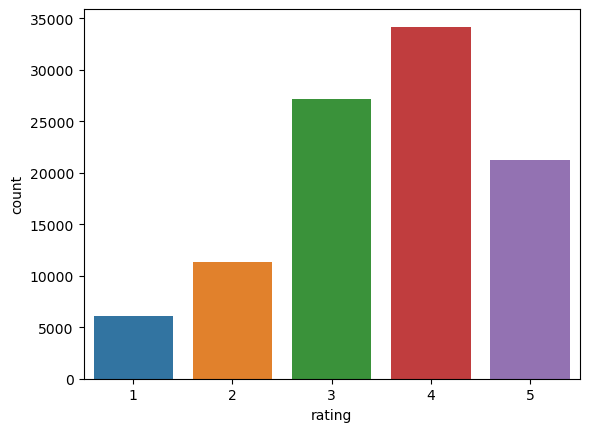

In [21]:
sns.countplot(data=ratings, x="rating")

In [23]:
title = movies[movies["movie_id"] == 23]
title

,movie_id,title,release_date,video_release_date,url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
22,23,Taxi Driver (1976),16-Feb-1996,NaN,http://us.imdb.com/M/title-exact?Taxi%20Driver...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
